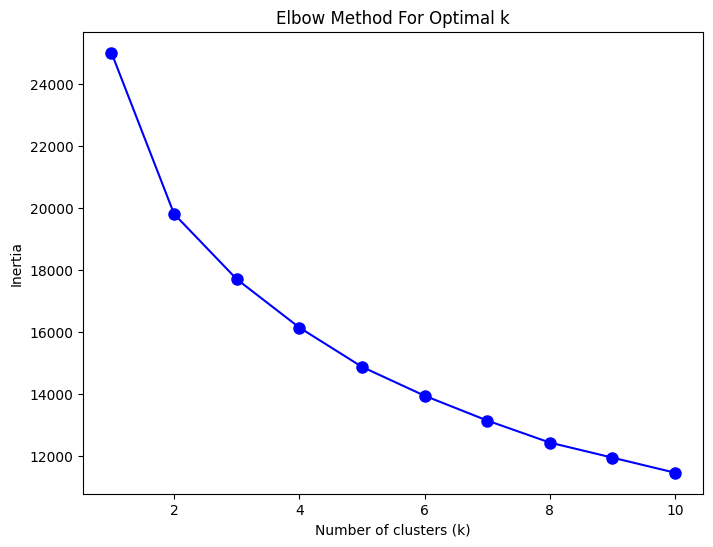

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset from a URL or a local file
data = pd.read_csv('/content/USA_Housing (1).csv')

# Omit the last attribute (column)
data = data.iloc[:, :-1]

# Standardize the data (optional but recommended for K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


Cluster centers:
 [[ 0.50124912  0.1904127  -0.66684728 -0.57448953 -0.54252613]
 [-0.58938849 -0.23853651 -0.29229191 -0.48345379  0.65285905]
 [ 0.08714592  0.04705041  0.90929297  1.00398928 -0.1085477 ]]

Number of samples per cluster:
 Cluster
2    1727
0    1637
1    1636
Name: count, dtype: int64


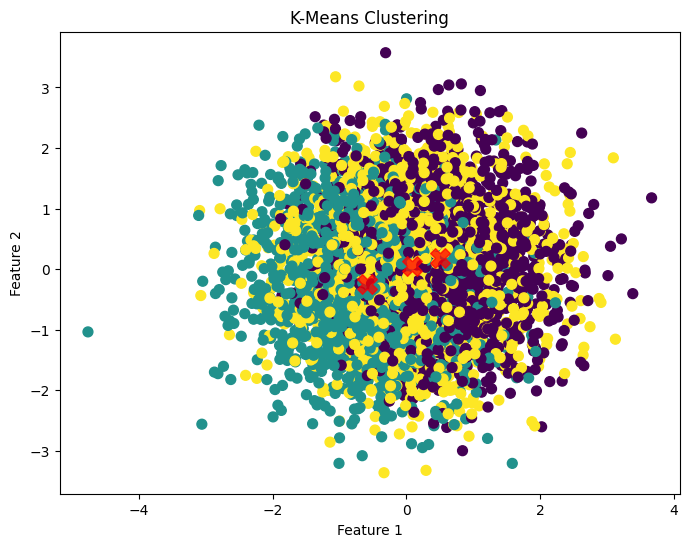

In [7]:
k_optimal = 3 # Adjust based on your elbow curve result
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Print out the cluster centers and the number of samples per cluster
print("Cluster centers:\n", kmeans.cluster_centers_)
print("\nNumber of samples per cluster:\n", data['Cluster'].value_counts())

# Optional: Visualize the clusters if the data is 2D or reduced to 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()